In [1]:
import numpy as np
from numpy import linalg

In [3]:
#define an array
A = np.arange(9) - 3
A

array([-3, -2, -1,  0,  1,  2,  3,  4,  5])

In [4]:
B = A.reshape((3,3))
B

array([[-3, -2, -1],
       [ 0,  1,  2],
       [ 3,  4,  5]])

In [6]:
# Euclidean (L2) norm -default
print(np.linalg.norm(A))
print(np.linalg.norm(B))

8.306623862918075
8.306623862918075


In [7]:
# the Frogenious norm is the L" norm for a matrix
print(np.linalg.norm(B,'fro'))

8.306623862918075


In [8]:
# the max norm (P = infinity)
print(np.linalg.norm(A, np.inf))
print(np.linalg.norm(B,np.inf))

5.0
12.0


In [10]:
# vector normalization - normalization to produce a unit vector
norm = np.linalg.norm(A)
A_unit = A / norm
print(A_unit)

[-0.36115756 -0.24077171 -0.12038585  0.          0.12038585  0.24077171
  0.36115756  0.48154341  0.60192927]


In [19]:
# the magnitude of a unit vector is equal to 1
np.linalg.norm((A_unit))

0.9999999999999999

### Eigendecomposition

Eigenvalues and eigenvectors are easy to find with Python and NumPy.An eigenvector of a square matrix $\textbf{A}$ is a nozero vector $\textbf{v}$ such that multiplication by $\textbf{A}$ alters only the scale of $\textbf{v}$ 
$$\textbf{Av} = \lambda\textbf{v} $$ The scalar $\lambda$ is known as the eigenvalue corresponding to this eigenvector.

In [20]:
# find the eigenvalues and the eigenvectora for a simple square matrix
A = np.diag(np.arange(1,4))
A

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(A)

In [22]:
#retirns the eigenvalues for the matrix
eigenvalues

array([1., 2., 3.])

In [23]:
# returns the eigenvectors for the matrix
eigenvectors

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [24]:
# each column is an eigenvector

In [25]:
# the eigenvalue w[i] correspond to the eigenvector v[:,i]
print('Eigenvalue: {}'.format(eigenvalues[1]))
print('Eigenvector: {}'.format(eigenvectors[:,1]))

Eigenvalue: 2.0
Eigenvector: [0. 1. 0.]


We can easily double check that these are the correct eigenvalues and eigenvectors, by plugging them back into the eigendecomposition equation.
The eigendecomposition of $\textbf{A}$ is given by $$\textbf{A} = \textbf{V}diag(\lambda)\textbf{V}^{-1}$$ where $\lambda$ is equal to a vector of the eigenvalues, and $\textbf{V}$ is a matrix with one eigenvector per column.

In [28]:
np.linalg.inv(eigenvectors)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [29]:
# verify eigendecomposition
matrix = np.matmul(np.diag(eigenvalues),np.linalg.inv(eigenvectors))
output = np.matmul(eigenvectors, matrix).astype(np.int)
print(output)

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [30]:
matrix

array([[1., 0., 0.],
       [0., 2., 0.],
       [0., 0., 3.]])

Eigenvectors and eigenvalues can often seem difficult conceptually. It is helpful to visualize the eigenvectors and their multiplication with the original matrix, $\textbf{A}$. Using matplotlib, we can accomplish this quickly.

In [26]:
# import necessary matplotlib libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

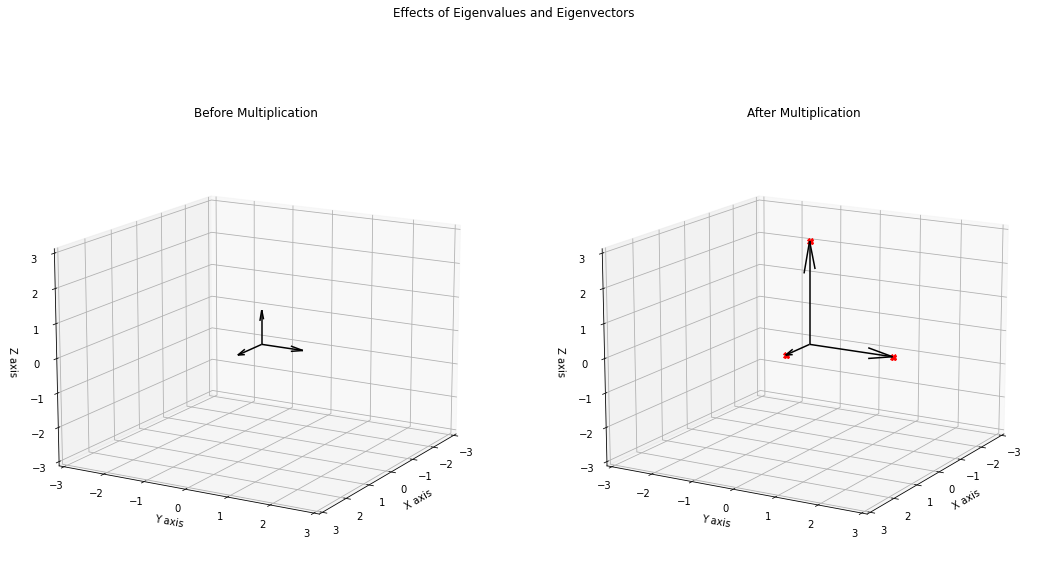

In [27]:
# plot the eigenvectors
origin = [0,0,0]

fig = plt.figure(figsize=(18,10))
fig.suptitle('Effects of Eigenvalues and Eigenvectors')
ax1 = fig.add_subplot(121, projection='3d')

ax1.quiver(origin, origin, origin, eigenvectors[0, :], eigenvectors[1, :], eigenvectors[2, :], color = 'k')
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])
ax1.set_zlim([-3, 3])
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.view_init(15, 30)
ax1.set_title("Before Multiplication")

# multiply original matrix by eigenvectors
new_eig = np.matmul(A, eigenvectors)
ax2 = plt.subplot(122, projection='3d')

# plot the new vectors
ax2.quiver(origin, origin, origin, new_eig[0, :], new_eig[1, :], new_eig[2, :], color = 'k')

# plot the eigenvalues for each vector (the amount the vector should be scaled by)
ax2.plot((eigenvalues[0]*eigenvectors[0]), (eigenvalues[1]*eigenvectors[1]), (eigenvalues[2]*eigenvectors[2]), 'rX')
ax2.set_title("After Multiplication")
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_zlim([-3, 3])
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.view_init(15, 30)

# show the plot!
plt.show()

# Some theory
Eigendecomposition – breaking mathematical objects into their constituent parts! Ex. 10 = 2*5, integers broken down into their prime numbers

Eigenvalue decomposition is used in principle components analysis (PCA)

PCA is a statistical procedure that is used to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It is a great way of compressing a dataset.
In other words, PCA is a method of ‘summarizing’ the data or ‘compressing’ the data
